In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Implementing Convolution Manually**

In [33]:
def convolve_2d(image, kernel, stride=1, padding="valid", mode="convolution"):
    img = np.array(image, dtype=np.float32)
    kernel = np.array(kernel, dtype=np.float32)
    
    if mode == "convolution":
        kernel = np.flipud(np.fliplr(kernel)) # Flipping kernel
        
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape

    if padding == "same":
        pad_h, pad_w = k_h // 2, k_w // 2
        img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    out_h = (img.shape[0] - k_h) // stride + 1
    out_w = (img.shape[1] - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = img[i * stride:i * stride + k_h, j * stride:j * stride + k_w]
            output[i, j] = np.sum(region * kernel)

    return output

**Applying Different Kernels**

In [34]:
image = cv2.imread("//kaggle/input/image1/dog.jpeg", cv2.IMREAD_GRAYSCALE)

# Edge Detection - Sobel Operator
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobelx, sobely)
edges = np.uint8(edges)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)

# Blurring - Stronger Gaussian Blur
blurred = cv2.GaussianBlur(image, (55,55), 0)

# Sharpening - Prevent Overexposure
sharpen_kernel = np.array([[ 0, -1,  0], 
                           [-1,  5, -1], 
                           [ 0, -1,  0]], dtype=np.float32)

sharpened = cv2.filter2D(image, -1, sharpen_kernel)
sharpened = np.clip(sharpened, 0, 255)  # Prevention from overexposure
sharpened = np.uint8(sharpened)

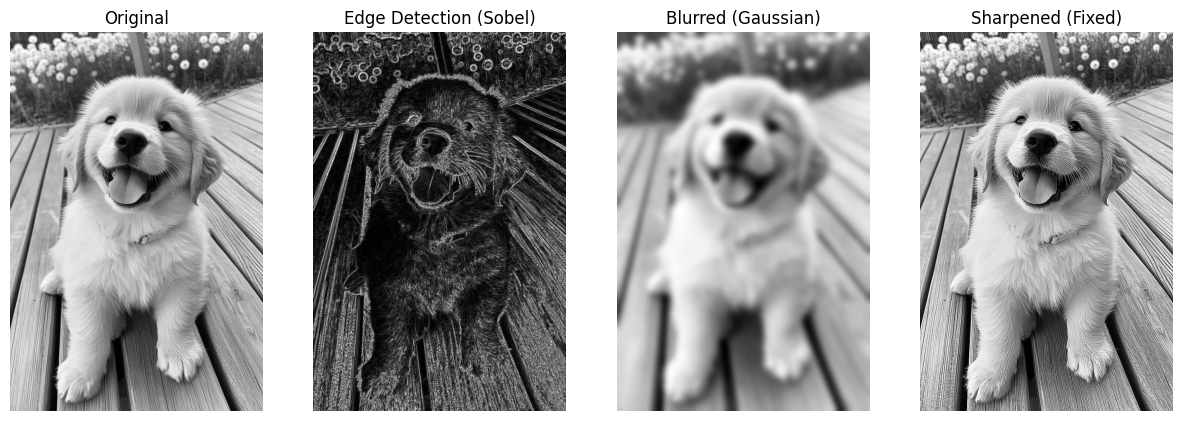

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Edge Detection (Sobel)")

axes[2].imshow(blurred, cmap='gray')
axes[2].set_title("Blurred (Gaussian)")

axes[3].imshow(sharpened, cmap='gray')
axes[3].set_title("Sharpened (Fixed)")

for ax in axes:
    ax.axis("off")

plt.show()

**Comparing Convolution vs. Correlation**

In [36]:
symmetric_kernel = np.array([[0.25, 0.25], 
                             [0.25, 0.25]])

non_symmetric_kernel = np.array([[ 1,  2,  1], 
                                 [ 0,  0,  0], 
                                 [-1, -2, -1]])

In [37]:
conv_symmetric = convolve_2d(image, symmetric_kernel, mode="convolution")
corr_symmetric = convolve_2d(image, symmetric_kernel, mode="correlation")

conv_non_symmetric = convolve_2d(image, non_symmetric_kernel, mode="convolution")
corr_non_symmetric = convolve_2d(image, non_symmetric_kernel, mode="correlation")

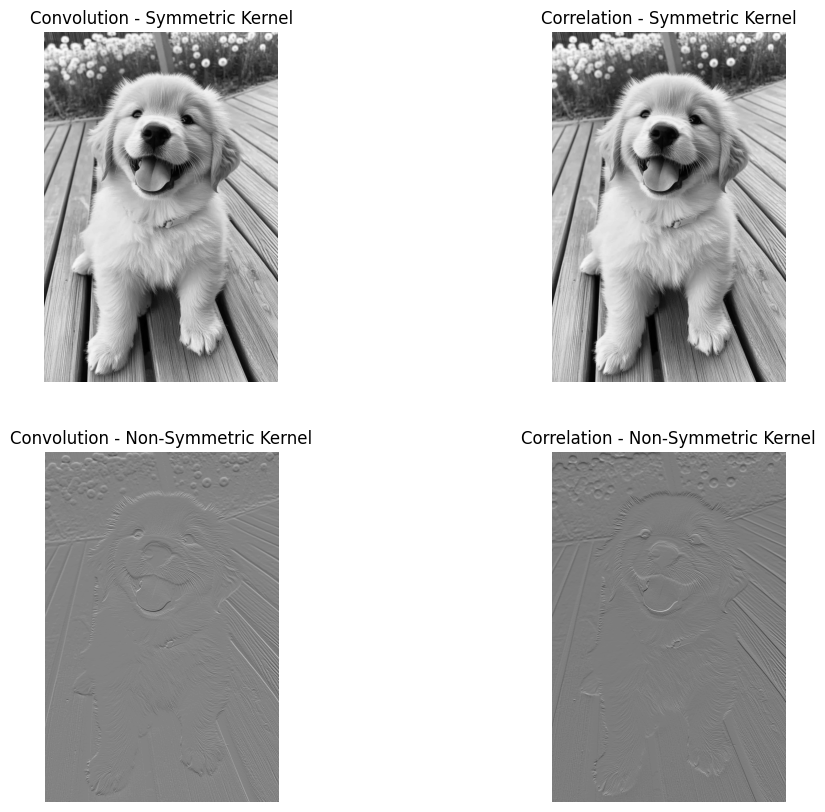

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(conv_symmetric, cmap='gray')
axes[0, 0].set_title("Convolution - Symmetric Kernel")

axes[0, 1].imshow(corr_symmetric, cmap='gray')
axes[0, 1].set_title("Correlation - Symmetric Kernel")

axes[1, 0].imshow(conv_non_symmetric, cmap='gray')
axes[1, 0].set_title("Convolution - Non-Symmetric Kernel")

axes[1, 1].imshow(corr_non_symmetric, cmap='gray')
axes[1, 1].set_title("Correlation - Non-Symmetric Kernel")

for ax in axes.ravel():
    ax.axis("off")

plt.show()